In [2]:
import pandas as pd
import supy as sp
import matplotlib.pyplot as plt
from functions.night import *
from functions.dict_legend import *
from pathlib import Path
in_folder = Path("../data/")
sp.show_version()

SuPy version: 2023.7.3.dev62
-------------


In [3]:
# OHM. Sampledata Q* modelled with L↓ modelled using air temperature and relative humidity supplied in meteorological forcing file [Loridan et al., 2011]. Zenith angle not accounted for in albedo calculation.d
s_rc = in_folder / "sample_data/RunControl.nml"


df_state_init_s = sp.init_supy(s_rc)
# switch to OHM-based storage heat method
df_state_init_s.storageheatmethod=1
# switch to SPARTACUS-based radiation scheme
df_state_init_s.netradiationmethod=3

2024-02-28 13:10:01,317 - SuPy - INFO - All cache cleared.


In [4]:
# Metdata
grid = df_state_init_s.index[0]
df_forcing = sp.load_forcing_grid(s_rc, grid)
s = "2012 07 1"
s2 = "2012 07 10"
e = "2012 07 31"

# # warm week 2012  to reduce time for test setup
df_forcing = df_forcing.loc[s2:e].iloc[1:]
# df_forcing2 = df_forcing.loc[s2:e].iloc[1:]

2024-02-28 13:10:03,724 - SuPy - INFO - All cache cleared.


In [5]:
s_rc = in_folder / "sample_data2/RunControl.nml"
df_state_init_s2 = sp.init_supy(s_rc)
# df_state_init_s2 = df_state_init_s.copy()
# switch to EHC-based heat storage scheme
df_state_init_s2.storageheatmethod = 5
df_state_init_s3 = df_state_init_s2.copy()
df_state_init_s3.k_surf *= 3
df_state_init_s3.k_wall *= 3
df_state_init_s3.k_roof *= 3


df_state_init_s4 = df_state_init_s2.copy()
df_state_init_s4.k_surf *= 4
df_state_init_s4.k_wall *= 4
df_state_init_s4.k_roof *= 4

2024-02-28 13:10:29,750 - SuPy - INFO - All cache cleared.


In [6]:
dict_output = {}
dict_state = {
    "ohm": df_state_init_s,
    "ech": df_state_init_s2,
    "ech_k*3": df_state_init_s3,
    "ech_k*4": df_state_init_s4,
}
for cfg, df_state in dict_state.items():
    if cfg in dict_output.keys():
        continue
    print(f'working on {cfg}...')
    df_output, df_state_final = sp.run_supy(df_forcing, df_state)
    dict_output[cfg] = df_output

working on ohm...
2024-02-28 13:10:38,174 - SuPy - INFO - ====================
2024-02-28 13:10:38,175 - SuPy - INFO - Simulation period:
2024-02-28 13:10:38,176 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-02-28 13:10:38,177 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-28 13:10:38,177 - SuPy - INFO - 
2024-02-28 13:10:38,178 - SuPy - INFO - No. of grids: 1
2024-02-28 13:10:38,178 - SuPy - INFO - SuPy is running in serial mode
2024-02-28 13:10:39,478 - SuPy - INFO - Execution time: 1.3 s
2024-02-28 13:10:39,478 - SuPy - INFO - ====================

working on ech...
2024-02-28 13:10:39,479 - SuPy - INFO - ====================
2024-02-28 13:10:39,479 - SuPy - INFO - Simulation period:
2024-02-28 13:10:39,479 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-02-28 13:10:39,480 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-28 13:10:39,480 - SuPy - INFO - 
2024-02-28 13:10:39,480 - SuPy - INFO - No. of grids: 1
2024-02-28 13:10:39,481 - SuPy - INFO - SuPy is running in seri

<AxesSubplot: title={'center': 'QS'}, xlabel='datetime'>

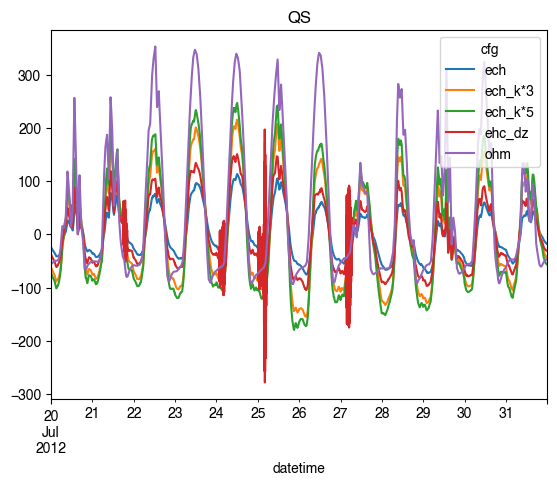

In [48]:
df_merge = pd.concat(dict_output, axis=1, names=["cfg"]).loc[1].stack("cfg")
df_merge.loc[:,'SUEWS'].loc[:,'QS'].unstack('cfg').loc['2012-7-20':].plot(title="QS")

In [ ]:
df_merge.unstack('cfg').loc[:,'SUEWS'].loc[:,'QS']

In [10]:
df_state_init_s4.filter(like='dz_').loc[1].unstack()

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)",...,"(5, 0)","(5, 1)","(5, 2)","(5, 3)","(5, 4)","(6, 0)","(6, 1)","(6, 2)","(6, 3)","(6, 4)"
var,,,,,,,,,,,,,,,,,,,,,
dz_roof,0.2,0.10,0.10,0.01,0.01,0.2,0.1,0.1,0.01,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dz_wall,0.2,0.10,0.10,0.01,0.01,0.2,0.1,0.1,0.01,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dz_surf,0.2,0.15,0.01,0.01,0.01,0.2,0.1,0.1,0.50,1.60,...,0.2,0.05,0.1,0.1,2.2,0.2,0.05,0.1,0.1,2.2


In [15]:
df_state_init_s4.dz_roof.filter(like='0)')

ind_dim,"(0, 0)","(1, 0)","(2, 0)"
grid,,,
1,0.2,0.2,0.2


In [40]:
df_state_init_s2.dz_wall

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,0.2,0.1,0.1,0.01,0.01,0.2,0.1,0.1,0.01,0.01,0.2,0.1,0.1,0.01,0.01


In [46]:
# test different dz settings
df_state_init_s5 = df_state_init_s2.copy()
df_state_init_s5.dz_roof = (
    np.repeat([[0.1, 0.1, 0.1, 0.1, 0.2]], 3, axis=0).flatten().reshape(1, -1)
)
df_state_init_s5.dz_wall = df_state_init_s5.dz_roof.values

df_output,df_state_final = sp.run_supy(df_forcing.iloc[:], df_state_init_s5)

dict_output['ehc_dz'] = df_output

2024-02-28 14:40:35,671 - SuPy - INFO - ====================
2024-02-28 14:40:35,672 - SuPy - INFO - Simulation period:
2024-02-28 14:40:35,672 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-02-28 14:40:35,673 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-28 14:40:35,673 - SuPy - INFO - 
2024-02-28 14:40:35,674 - SuPy - INFO - No. of grids: 1
2024-02-28 14:40:35,674 - SuPy - INFO - SuPy is running in serial mode
2024-02-28 14:43:42,075 - SuPy - INFO - Execution time: 186.4 s
2024-02-28 14:43:42,075 - SuPy - INFO - ====================



In [47]:
df_output.loc[1,'SUEWS'].loc[:,'QS']

datetime
2012-07-10 00:05:00    184.083517
2012-07-10 00:10:00     71.576775
2012-07-10 00:15:00    197.964016
2012-07-10 00:20:00     66.522823
2012-07-10 00:25:00    184.171458
                          ...    
2012-07-31 23:35:00    -30.702597
2012-07-31 23:40:00    -31.089808
2012-07-31 23:45:00    -31.306146
2012-07-31 23:50:00    -31.277544
2012-07-31 23:55:00    -31.200925
Freq: 300S, Name: QS, Length: 6335, dtype: float64